## RandomForestClassifier

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np

In [3]:
insu=pd.read_csv('insurance.csv')
insu.head()

,member_name,email,gender,location,employer,relationship,patient_name,patient_suffix,patient_dob,cause,Fee_Charged,membership_period,number_of_claims,number_of_dependants,label
0,Chipi,ajimmison0@sun.com,female,Kwekwe,Vipe,Grandfather,Mabhena,789,09-11-1997,Other,3798,1541,2,4,0
1,Femba,rsoonhouse1@google.it,female,Marondera,Mudo,Husband,Sithole,860,1/14/1992,Other,48905,8269,4,3,0
2,Geta,bchecchetelli2@house.gov,female,Rusape,Skaboo,Mother,Chipi,374,07-03-1999,Road Traffic Accident,39963,6223,2,2,0
3,Tichaona,mgarman3@psu.edu,female,Rusape,Babbleset,Father,Jembwa,729,7/31/1978,Road Traffic Accident,34948,8832,6,3,0
4,Chisa,ccough4@biglobe.ne.jp,female,Bulawayo,Flipopia,Father,Foto,716,12/28/1992,Accident At Work,46984,8804,1,2,1


### We are using drop_duplicates() to eliminate  duplicated information

In [4]:
insu = insu.drop_duplicates()

In [5]:
insu.isnull().sum()

member_name             0
email                   0
gender                  0
location                0
employer                0
relationship            0
patient_name            0
patient_suffix          0
patient_dob             0
cause                   0
Fee_Charged             0
membership_period       0
number_of_claims        0
number_of_dependants    0
label                   0
dtype: int64

### Shape of our table 

In [6]:
insu.shape

(7000, 15)

In [7]:
insu.tail()

,member_name,email,gender,location,employer,relationship,patient_name,patient_suffix,patient_dob,cause,Fee_Charged,membership_period,number_of_claims,number_of_dependants,label
6995,Mirwa,gcobbern@microsoft.com,male,Kwekwe,Trudeo,Grandmother,Mabhena,595,11/30/1984,Other,25308,6478,4,3,0
6996,Chisa Chisi,ebrasierro@sakura.ne.jp,male,Gweru,Jetwire,Husband,Bima,158,08-06-1986,Accident At Home,32895,438,1,1,0
6997,Evans,ybuckyrp@slashdot.org,male,Rusape,Realpoint,Daughter,Dihwa,743,2/13/1980,Accident At Home,19082,8134,3,1,0
6998,Femba,raskawrq@washington.edu,female,Gweru,Eimbee,Brother,Peterson,472,12/28/2001,Other,31717,8293,4,3,1
6999,Sithole,wlantrr@quantcast.com,male,Gweru,Camimbo,Mother,Sibanda,625,3/21/2003,Other,29020,3686,3,4,0


### Converting cause and gender column into numericals.

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

var = ['cause', 'gender']

for i in var:
    insu[i] = le.fit_transform(insu[i]).astype(int)

### Importing train_test_split for Training the machine 

In [9]:
features = ['gender','cause','Fee_Charged','membership_period','number_of_claims','number_of_dependants']
x1=insu[features]
y1=insu['label']

In [10]:
import imblearn 
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
RS= RandomOverSampler(random_state=1)
x,y=RS.fit_resample(x1,y1)
print('BEFORE SAMPLING DATA : ',Counter(y1))
print(' AFTER SAMPLING DATA :',Counter(y))

BEFORE SAMPLING DATA :  Counter({0: 5621, 1: 1379})
 AFTER SAMPLING DATA : Counter({0: 5621, 1: 5621})


### We split Train and test data into 7:3 ratio

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y, random_state=42)

In [12]:
from sklearn.ensemble import RandomForestClassifier

In [13]:
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)

RandomForestClassifier()

In [14]:
y_prediction=RFC.predict(x_test)

In [15]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, plot_confusion_matrix

In [16]:
Acs=accuracy_score(y_test,y_prediction)
print('Accuracy Score : ',Acs*100)

Accuracy Score :  92.66340595820365


In [17]:
from sklearn.metrics import hamming_loss
hl=hamming_loss(y_test,y_prediction)
print('Accuracy Score : ',hl*100)

Accuracy Score :  7.336594041796355


In [18]:
cr=classification_report(y_test,y_prediction)
print('classification_report: \n\n',cr)

classification_report: 

               precision    recall  f1-score   support

           0       0.97      0.88      0.92      1125
           1       0.89      0.97      0.93      1124

    accuracy                           0.93      2249
   macro avg       0.93      0.93      0.93      2249
weighted avg       0.93      0.93      0.93      2249



In [19]:
cm = confusion_matrix(y_test,y_prediction)
print("Confusion report \n\n", cm)


Confusion report 

 [[ 989  136]
 [  29 1095]]


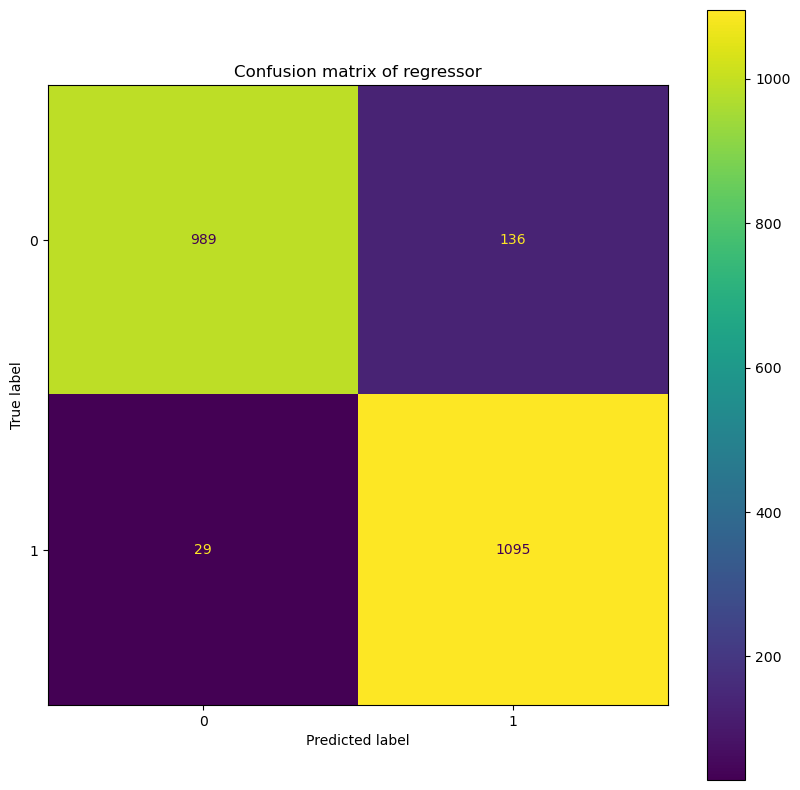

In [20]:
# P Confusion matrix
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,10))
plot_confusion_matrix(RFC, x_test, y_test, ax=ax)
plt.title('Confusion matrix of regressor')
plt.show()

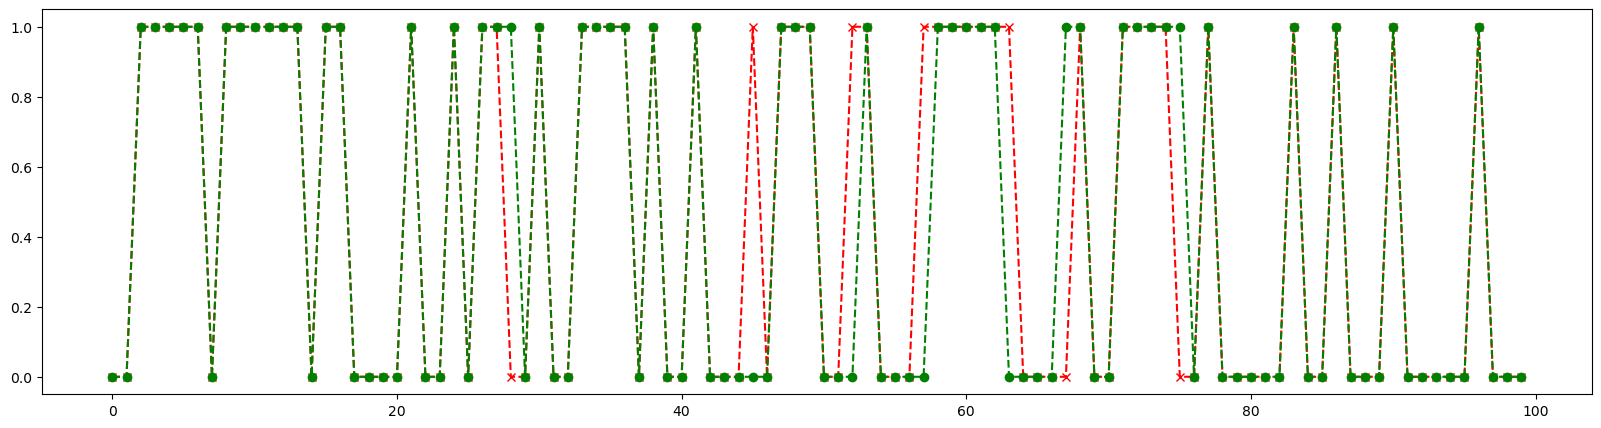

In [21]:
df2=pd.DataFrame()
df2['y_test']=y_test
df2['predicted']=y_prediction
df2.reset_index(inplace=True)
plt.figure(figsize=(20,5))
plt.plot(df2['predicted'][:100],marker='x',linestyle='dashed',color='red')
plt.plot(df2['y_test'][:100],marker='o',linestyle='dashed',color='green')
plt.show()